## Data Generation

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("GBcomments.csv",error_bad_lines=False)
df2 = pd.read_csv("UScomments.csv",error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\pandian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df1

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0
...,...,...,...,...
718447,lLN1FwiqGwc,MEME ME MEME ME MEME ME,0,0
718448,lLN1FwiqGwc,"Yeah, but does everybody float?",0,0
718449,lLN1FwiqGwc,That meme me dace 😂,0,0
718450,lLN1FwiqGwc,10:43 Is that Miles Upshur????,2,0


In [4]:
df2

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


### Creating a dataset using two different comments dataset

In [5]:
df = pd.concat([df1,df2])

In [6]:
df

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


In [7]:
df.shape

(1409852, 4)

In [8]:
df.isna().sum()

video_id         0
comment_text    53
likes            0
replies          0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df = df.iloc[0:7000] #Restricting the size for faster computations

In [11]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [12]:
# preprocess= lambda text: " ".join([i.lemma_ for i in nlp(text) if i.pos_ not in "PUNCT" and nlp.vocab[i.text].is_stop is False])

### Preprocessing the comments by removing stopwords and punctuations

In [13]:
def textprocess(text):
    doc = nlp(text)
    return(" ".join([i.lemma_ for i in doc if i.pos_ not in "PUNCT" and nlp.vocab[i.text].is_stop is False]))

In [14]:
from tqdm import tqdm
tokenized = []
for count,i in tqdm(enumerate(df['comment_text'])):
    tokenized.append(textprocess(i))
#     print(count)

7000it [00:45, 153.43it/s]


In [15]:
len(tokenized)

7000

In [16]:
df = df.iloc[:len(tokenized),:]
df.shape

(7000, 4)

In [17]:
df['comments_preprocessed'] = tokenized

In [18]:
# import time
# start = time.time()
# df['comments_preprocessed'] = df['comment_text'].apply(preprocess)
# end = time.time()
# print("Time:",end-start)

In [19]:
df

,video_id,comment_text,likes,replies,comments_preprocessed
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,accurate M+ 1000 price close call x 10
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,samsung phone\n 😂 😂 😂
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,thank gosh place watch have HD speed support hd
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,happen home button iPhone X cough****copying s...
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,power disease Care cure care well life
...,...,...,...,...,...
6995,9CILSvf1snQ,They look pretty damn good.,1,0,look pretty damn good
6996,9CILSvf1snQ,hello,1,0,hello
6997,9CILSvf1snQ,Masallah😍😍😍😍,2,0,Masallah 😍 😍 😍 😍
6998,9CILSvf1snQ,😍😍😍😍😍😍😍😍😍😍😍😍,2,0,😍 😍 😍 😍 😍 😍 😍 😍 😍 😍 😍 😍


In [20]:
df.to_csv("data_preprocessed_1.csv", header=True, index = None)
# df = pd.read_csv("data_preprocessed_1.csv")

In [21]:
df.head()

,video_id,comment_text,likes,replies,comments_preprocessed
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,accurate M+ 1000 price close call x 10
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,samsung phone\n 😂 😂 😂
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,thank gosh place watch have HD speed support hd
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,happen home button iPhone X cough****copying s...
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,power disease Care cure care well life


In [22]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [23]:
df.isna().sum()

video_id                 0
comment_text             0
likes                    0
replies                  0
comments_preprocessed    0
dtype: int64

In [24]:
df.dropna(inplace=True)

In [25]:
df.isna().sum()

video_id                 0
comment_text             0
likes                    0
replies                  0
comments_preprocessed    0
dtype: int64

In [26]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pandian\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
s = SentimentIntensityAnalyzer()

In [28]:
def find_score(text):
    return s.polarity_scores(text)['compound']

### Finding the compound score for each comment

In [29]:
from tqdm import tqdm
compound = []
for count,i in tqdm(enumerate(df['comments_preprocessed'])):
    compound.append(find_score(i))
#     print(count)

7000it [00:00, 9496.52it/s] 


In [30]:
compound

[0.0,
 0.0,
 0.6369,
 0.0,
 0.8176,
 0.7096,
 0.3182,
 -0.1779,
 -0.4767,
 0.8074,
 0.0,
 0.0,
 0.0,
 0.3612,
 0.0,
 0.6369,
 0.0,
 0.5766,
 0.4939,
 0.5267,
 0.0,
 -0.34,
 0.1779,
 0.9944,
 0.0,
 0.891,
 0.4404,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5859,
 0.0,
 0.4404,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4404,
 0.4939,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8126,
 0.0,
 -0.6739,
 0.0,
 0.0,
 0.0,
 -0.5994,
 0.0,
 0.4215,
 0.4019,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5423,
 -0.5574,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6249,
 0.0,
 0.0,
 0.5473,
 0.5859,
 0.0,
 0.0,
 0.0258,
 -0.1779,
 0.0,
 -0.4939,
 0.0,
 0.4215,
 0.4939,
 -0.4215,
 0.4939,
 0.0,
 0.5859,
 0.0,
 -0.4939,
 0.0,
 0.1779,
 0.6369,
 0.4404,
 0.0,
 -0.5423,
 0.9117,
 0.2732,
 0.0,
 0.0,
 0.0,
 0.0772,
 -0.5423,
 0.6697,
 0.5719,
 0.0,
 0.0,
 0.0,
 0.5267,
 0.3612,
 0.296,
 0.0,
 0.2023,
 0.5423,
 0.0,
 0.0,
 0.0,
 0.7906,
 0.0,
 -0.5994,
 0.296,
 -0.7906,
 0.2263,
 0.4019,
 0.

In [31]:
df['compound'] = compound

In [32]:
df

,video_id,comment_text,likes,replies,comments_preprocessed,compound
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,accurate M+ 1000 price close call x 10,0.0000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,samsung phone\n 😂 😂 😂,0.0000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,thank gosh place watch have HD speed support hd,0.6369
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,happen home button iPhone X cough****copying s...,0.0000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,power disease Care cure care well life,0.8176
...,...,...,...,...,...,...
6995,9CILSvf1snQ,They look pretty damn good.,1,0,look pretty damn good,0.5267
6996,9CILSvf1snQ,hello,1,0,hello,0.0000
6997,9CILSvf1snQ,Masallah😍😍😍😍,2,0,Masallah 😍 😍 😍 😍,0.0000
6998,9CILSvf1snQ,😍😍😍😍😍😍😍😍😍😍😍😍,2,0,😍 😍 😍 😍 😍 😍 😍 😍 😍 😍 😍 😍,0.0000


In [33]:
df.shape

(7000, 6)

### Annotating the comments data with sentiments - Positive, Neutral, Negative

In [34]:
find_sentiment = lambda compound: 'Positive' if compound > 0 else ('Neutral' if compound == 0 else 'Negative')

In [35]:
df['sentiment'] = df['compound'].apply(find_sentiment)

In [36]:
df

,video_id,comment_text,likes,replies,comments_preprocessed,compound,sentiment
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,accurate M+ 1000 price close call x 10,0.0000,Neutral
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,samsung phone\n 😂 😂 😂,0.0000,Neutral
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,thank gosh place watch have HD speed support hd,0.6369,Positive
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,happen home button iPhone X cough****copying s...,0.0000,Neutral
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,power disease Care cure care well life,0.8176,Positive
...,...,...,...,...,...,...,...
6995,9CILSvf1snQ,They look pretty damn good.,1,0,look pretty damn good,0.5267,Positive
6996,9CILSvf1snQ,hello,1,0,hello,0.0000,Neutral
6997,9CILSvf1snQ,Masallah😍😍😍😍,2,0,Masallah 😍 😍 😍 😍,0.0000,Neutral
6998,9CILSvf1snQ,😍😍😍😍😍😍😍😍😍😍😍😍,2,0,😍 😍 😍 😍 😍 😍 😍 😍 😍 😍 😍 😍,0.0000,Neutral


In [37]:
df['sentiment'].value_counts()

Positive    3410
Neutral     2257
Negative    1333
Name: sentiment, dtype: int64

In [38]:
df.shape

(7000, 7)

### Analyzing the comments data

<AxesSubplot:>

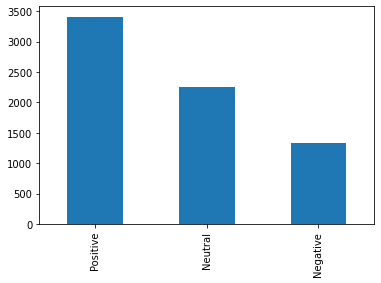

In [39]:
df['sentiment'].value_counts().plot.bar()

In [40]:
df.shape

(7000, 7)

In [41]:
sentiment_df = pd.get_dummies(df['sentiment'])
sentiment_df

,Negative,Neutral,Positive
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
6995,0,0,1
6996,0,1,0
6997,0,1,0
6998,0,1,0


In [42]:
df = pd.concat([df,sentiment_df], axis=1)
df

,video_id,comment_text,likes,replies,comments_preprocessed,compound,sentiment,Negative,Neutral,Positive
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,accurate M+ 1000 price close call x 10,0.0000,Neutral,0,1,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,samsung phone\n 😂 😂 😂,0.0000,Neutral,0,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,thank gosh place watch have HD speed support hd,0.6369,Positive,0,0,1
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,happen home button iPhone X cough****copying s...,0.0000,Neutral,0,1,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,power disease Care cure care well life,0.8176,Positive,0,0,1
...,...,...,...,...,...,...,...,...,...,...
6995,9CILSvf1snQ,They look pretty damn good.,1,0,look pretty damn good,0.5267,Positive,0,0,1
6996,9CILSvf1snQ,hello,1,0,hello,0.0000,Neutral,0,1,0
6997,9CILSvf1snQ,Masallah😍😍😍😍,2,0,Masallah 😍 😍 😍 😍,0.0000,Neutral,0,1,0
6998,9CILSvf1snQ,😍😍😍😍😍😍😍😍😍😍😍😍,2,0,😍 😍 😍 😍 😍 😍 😍 😍 😍 😍 😍 😍,0.0000,Neutral,0,1,0


### After all preprocessing the comments dataset is stored as csv file

In [43]:
df.to_csv("full_data_1.csv", header=True, index=None)